D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


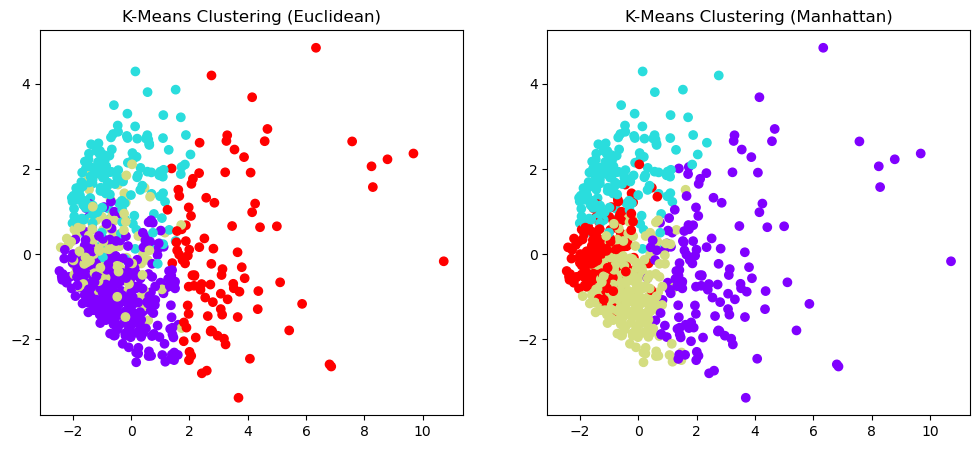

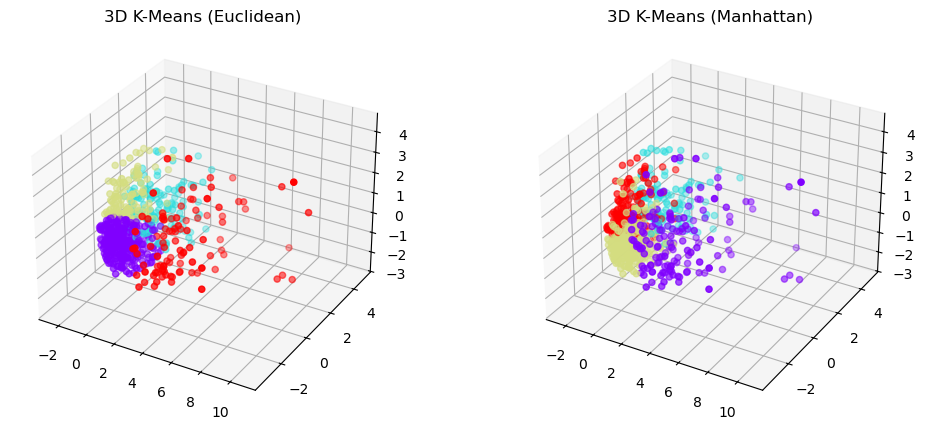

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist

# Step 1: Load the dataset
df = pd.read_csv('Cust_Segmentation.csv')

# Step 2: Preprocess
df = df.drop(columns=['Customer Id', 'Address'])  # Drop non-numeric and irrelevant columns
df = df.dropna()  # Drop rows with missing 'Defaulted' values

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Step 4: KMeans with Euclidean Distance (default)
k = 4  # You can experiment with this value
kmeans_euclidean = KMeans(n_clusters=k, random_state=42)
kmeans_euclidean.fit(scaled_features)
labels_euclidean = kmeans_euclidean.labels_

# Step 5: KMeans with Manhattan Distance (Custom implementation)
# Manhattan KMeans using pairwise Manhattan distance and custom centroid update
def manhattan_kmeans(X, k, max_iters=100):
    np.random.seed(42)
    initial_centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    for _ in range(max_iters):
        distances = cdist(X, initial_centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([np.median(X[labels == i], axis=0) for i in range(k)])
        if np.all(initial_centroids == new_centroids):
            break
        initial_centroids = new_centroids
    return labels, initial_centroids

labels_manhattan, centroids_manhattan = manhattan_kmeans(scaled_features, k)

# Step 6: Visualization in 2D using PCA
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(scaled_features)

plt.figure(figsize=(12, 5))

# Euclidean
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_euclidean, cmap='rainbow')
plt.title('K-Means Clustering (Euclidean)')

# Manhattan
plt.subplot(1, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_manhattan, cmap='rainbow')
plt.title('K-Means Clustering (Manhattan)')
plt.show()

# Step 7: Visualization in 3D
pca_3d = PCA(n_components=3)
data_3d = pca_3d.fit_transform(scaled_features)

fig = plt.figure(figsize=(12, 5))

# Euclidean 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels_euclidean, cmap='rainbow')
ax1.set_title('3D K-Means (Euclidean)')

# Manhattan 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels_manhattan, cmap='rainbow')
ax2.set_title('3D K-Means (Manhattan)')

plt.show()
